# ANALISIS EDA

### Rubén Cobarro Martínez y Javier Serrat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as ss
import warnings
from IPython.display import Image

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [4]:
def graf_barras(df, columna, isContinuous, var_objetivo):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[columna].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[columna].notnull(), columna], kde=False, ax=ax1)
    else:
        sns.countplot(df[columna].dropna(), order=sorted(df[columna].dropna().unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(columna)
    ax1.set_ylabel('Count')
    ax1.set_title(columna+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=columna, y=var_objetivo, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(columna + ' by '+var_objetivo)
    else:
        data = df.groupby(columna)[var_objetivo].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, var_objetivo, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = columna, y = 'proportion', hue= var_objetivo, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(var_objetivo+' fraction')
        ax2.set_title(var_objetivo)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(columna)
    
    plt.tight_layout()


def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0


def cramers_v(confusion_matrix):
    """ 
    calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    confusion_matrix: tabla creada con pd.crosstab()
    
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

## Lectura de datos

In [5]:
df = pd.read_csv('NCDB_1999_to_2014.csv')
df

C:\Users\ruben\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,U,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,4,18,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,Q,18,1,22,UUUU,01,M,67,12,3,01,U


Mostranos las primeras cinco filas para ver de forma general las columnas y distintos y cambiamos el data set a df para conservar el original

In [6]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3


Eliminamos duplicados y representacion de su dimension en comparacion al original

In [7]:
df.drop_duplicates()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,U,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,4,18,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,Q,18,1,22,UUUU,01,M,67,12,3,01,U


In [8]:
print(df.shape, df.drop_duplicates().shape)

(5860405, 22) (5855336, 22)


## Tratamiento de las variables

Primero cambiamos los valores desconocidos (UU) por NaN, ya que no nos aportan ningún valor y de esta manera podremos tratarlos.

In [9]:
for columna in df:
    df[columna] = df[columna].replace(["UU", "U", "UUU", "UUUU"], np.nan)

Tras cambiar los valores nulos a NaN podremos pasar las variables que considermos numericas y conservar las variables categoricas.
Observamos cual es la clase de las variables antes de tratarlas

In [10]:
df_dtypes = df.dtypes.to_frame('feature_type').reset_index()  
df_dtypes

,index,feature_type
0,C_YEAR,int64
1,C_MNTH,object
2,C_WDAY,object
3,C_HOUR,object
4,C_SEV,int64
5,C_VEHS,object
6,C_CONF,object
7,C_RCFG,object
8,C_WTHR,object
9,C_RSUR,object


Creamos la funcion para la transformación de las variables como hemos descrito previamente.

In [11]:
def columns_to_numeric(df, columns):
    df[columns] = df[columns].apply(pd.to_numeric, errors = 'coerce')
    for column in columns:
        if df[column].dtype == float:
            df[column] = df[column].astype('Int64')
    return df

Tras razonar cuales variables deberian ser numericas en base a la leyenda de cada variable, aplicamos la funcion a las mismas.

In [12]:
columns_to_numeric(df, ['C_HOUR', 'C_WDAY', 'C_MNTH', 'P_AGE', 'V_YEAR', 'C_VEHS'])

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,2,34,NaN,1,5,3,03,01,06,1990,01,M,41,11,1,NaN,1
1,1999,1,1,20,2,2,34,NaN,1,5,3,03,02,01,1987,01,M,19,11,1,NaN,1
2,1999,1,1,20,2,2,34,NaN,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,8,2,1,01,NaN,5,3,6,18,01,01,1986,01,M,46,11,1,NaN,1
4,1999,1,1,8,2,1,01,NaN,5,3,6,18,99,NN,<NA>,01,M,5,99,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,<NA>,<NA>,<NA>,2,<NA>,NaN,01,NaN,NaN,NaN,NaN,13,07,<NA>,01,M,24,11,1,NN,1
5860401,2014,<NA>,<NA>,23,2,1,06,05,1,1,NaN,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,<NA>,<NA>,14,2,1,02,01,1,5,4,18,1,01,2006,01,F,<NA>,11,2,01,1
5860403,2014,<NA>,<NA>,22,1,1,06,01,2,4,Q,18,1,22,<NA>,01,M,67,12,3,01,NaN


Observamos como el cambio se ha realizado exitosamente y no ha ocurrido ningún tipo de error.

In [13]:
df.dtypes

C_YEAR     int64
C_MNTH     Int64
C_WDAY     Int64
C_HOUR     Int64
C_SEV      int64
C_VEHS     Int64
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR     Int64
P_ID      object
P_SEX     object
P_AGE      Int64
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

## Exploracion variable objetivo

Decidimos estudiar, analizar e interpretar como variable objetivo C_SEV, la cual nos dice si ha habido al menos un muerto o ningún en los accidentes ocurridos. Dicha variable toma los siguientes valores:

- Al menos una muerte : 2
- Ninguna muerte : 1

Para poder visualizar mejor y más adelante no produzca algun tipo de error la convertimos los valores dos a uno y uno a 0.

In [14]:
df['C_SEV'] = df['C_SEV'].replace({2: 0, 1: 1})
df['C_SEV'] = df['C_SEV']
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2,34,NaN,1,5,3,03,01,06,1990,01,M,41,11,1,NaN,1
1,1999,1,1,20,0,2,34,NaN,1,5,3,03,02,01,1987,01,M,19,11,1,NaN,1
2,1999,1,1,20,0,2,34,NaN,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,8,0,1,01,NaN,5,3,6,18,01,01,1986,01,M,46,11,1,NaN,1
4,1999,1,1,8,0,1,01,NaN,5,3,6,18,99,NN,<NA>,01,M,5,99,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,<NA>,<NA>,<NA>,0,<NA>,NaN,01,NaN,NaN,NaN,NaN,13,07,<NA>,01,M,24,11,1,NN,1
5860401,2014,<NA>,<NA>,23,0,1,06,05,1,1,NaN,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,<NA>,<NA>,14,0,1,02,01,1,5,4,18,1,01,2006,01,F,<NA>,11,2,01,1
5860403,2014,<NA>,<NA>,22,1,1,06,01,2,4,Q,18,1,22,<NA>,01,M,67,12,3,01,NaN


Representación gráfica mediante un plot

In [15]:
df_plot_C_SEV = df['C_SEV']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_plot_C_SEV_conteo = df['C_SEV'].value_counts().reset_index()
df_plot_C_SEV_pc = pd.merge(df_plot_C_SEV, 
                                  df_plot_C_SEV_conteo , on=['index'], how='inner')

fig = px.histogram(df_plot_C_SEV_pc, x="index", y=['percent'])
fig.show()

También mostramos sus valores tanto cual es el porcentaje de cada valor siendo el 100% la suma de los dos y su cantidad numerica de los respectivos valores.

In [16]:
df_plot_C_SEV_pc

,index,percent,C_SEV
0,0,98.316959,5761772
1,1,1.683041,98633


In [17]:
# COLUMNAS PARA ELIMNAR VALORES MISSING

# Visualizacion valores Missing y Variables respecto a la objetivo

Realiazmos un sumatorio de las 

In [18]:
df_null_columns = df.isnull().sum().sort_values(ascending=False)
df_null_rows = df.isnull().sum(axis=1).sort_values(ascending=False)

print(df_null_columns.shape, df_null_rows.shape)

(22,) (5860405,)


In [19]:
pd_null_columnas = pd.DataFrame(df_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(df_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = df['C_SEV'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df.shape[1]

pd_null_columnas

,nulos_columnas,porcentaje_columnas
P_SAFE,615188,0.104974
V_YEAR,584378,0.099716
C_RCFG,504648,0.086111
C_RALN,434710,0.074177
P_AGE,395156,0.067428
P_SEX,234954,0.040092
C_TRAF,223483,0.038134
C_CONF,179019,0.030547
P_USER,175586,0.029961
C_WTHR,87975,0.015012


In [20]:
pd_null_filas

,nulos_filas,target,porcentaje_filas
5245711,16,1,0.727273
5245712,16,1,0.727273
2884064,13,0,0.590909
4651088,13,0,0.590909
3296668,13,0,0.590909
...,...,...,...
558053,0,0,0.000000
558049,0,0,0.000000
558048,0,0,0.000000
558047,0,0,0.000000


In [21]:
pd_null_filas_target = pd_null_filas[pd_null_filas['nulos_filas'] != 0]
pd_null_filas_target

,nulos_filas,target,porcentaje_filas
5245711,16,1,0.727273
5245712,16,1,0.727273
2884064,13,0,0.590909
4651088,13,0,0.590909
3296668,13,0,0.590909
...,...,...,...
3477732,1,0,0.045455
3514348,1,0,0.045455
858204,1,0,0.045455
1476848,1,0,0.045455


# Visualizacion de las variables respecto a la objetivo

TypeError: '<' not supported between instances of 'int' and 'str'

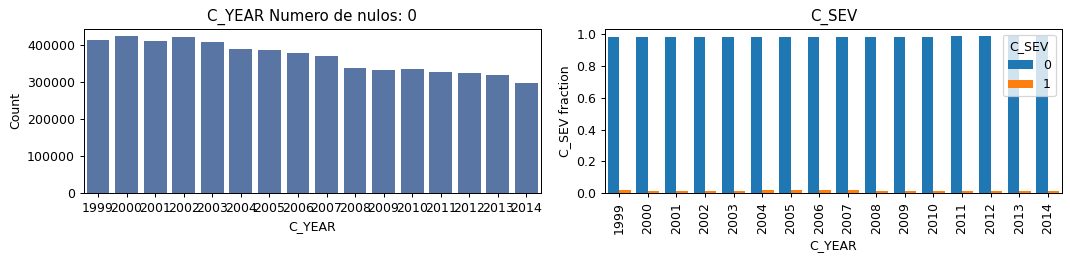

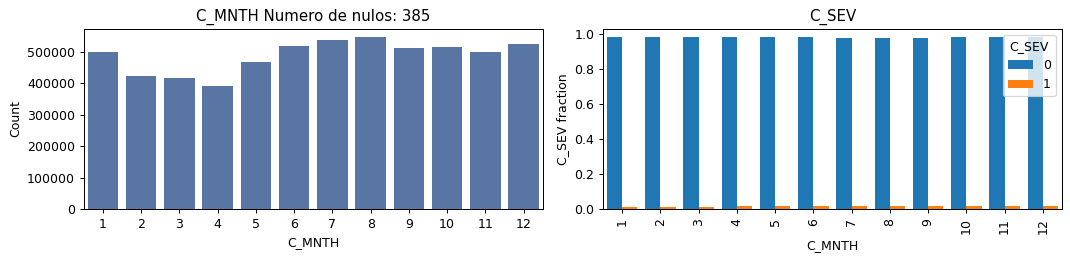

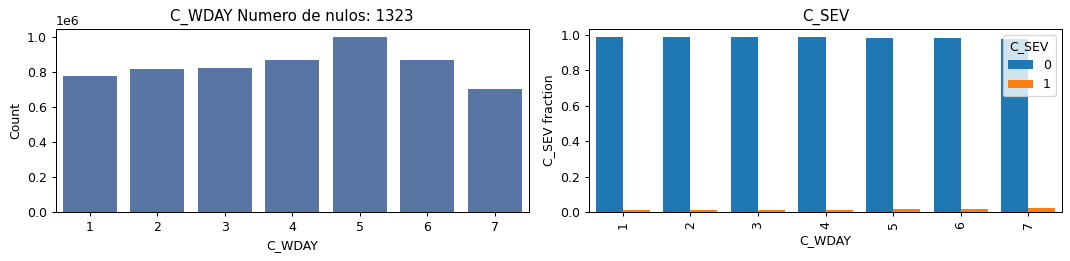

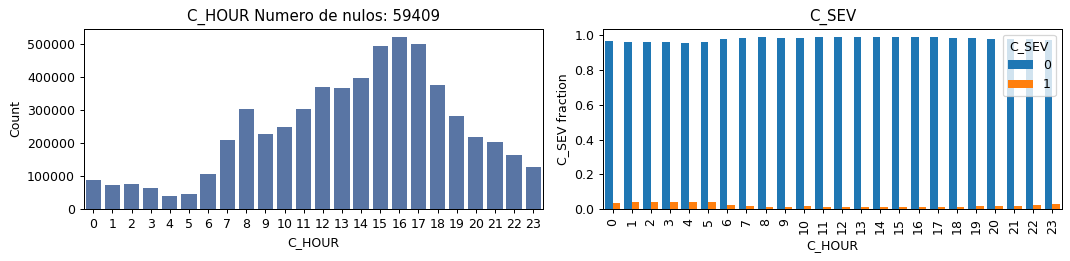

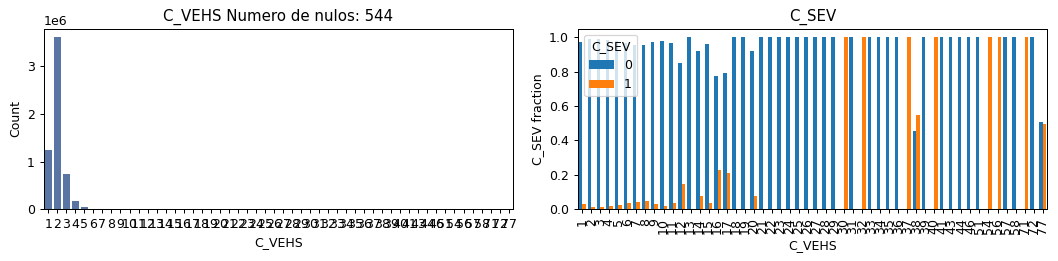

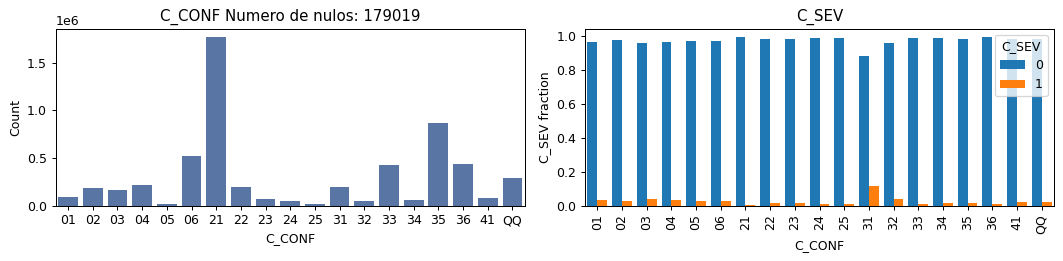

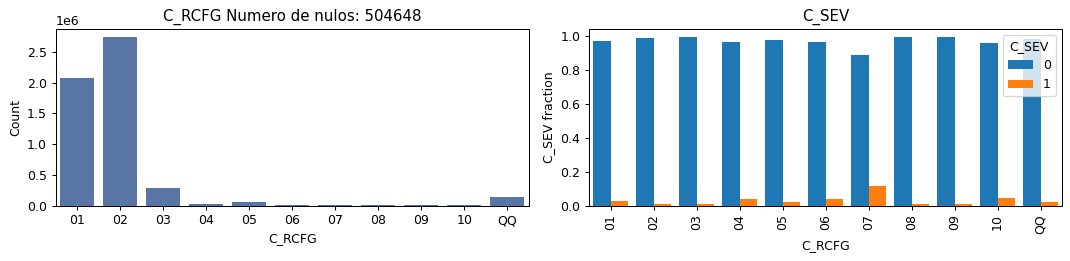

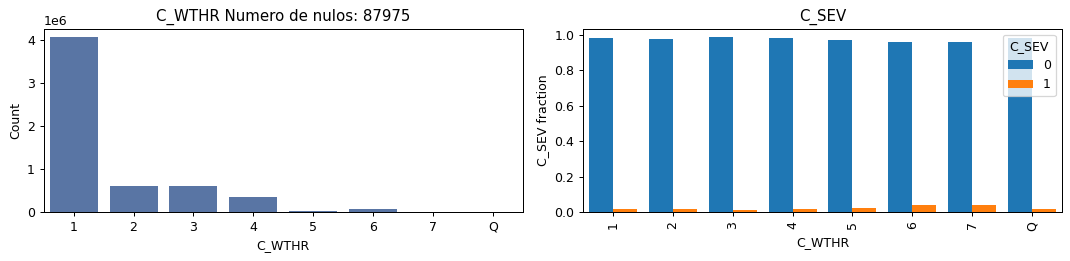

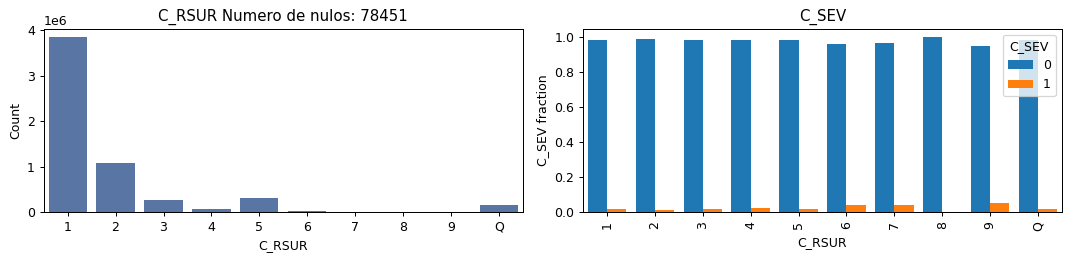

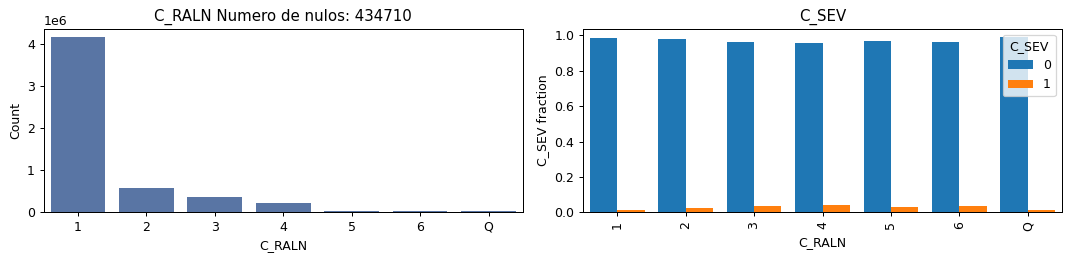

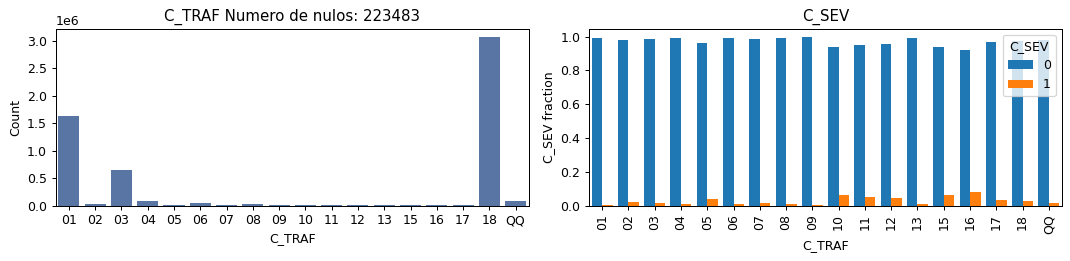

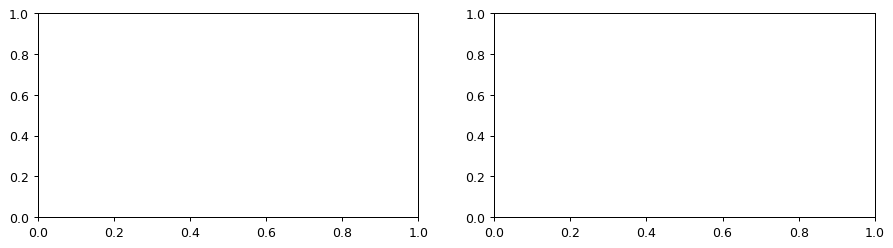

In [22]:
warnings.filterwarnings('ignore')
for i in df:
    if (df[i].dtype == int) & (i!='C_SEV'):
        graf_barras(df, columna=i, isContinuous=True, var_objetivo ='C_SEV')
    elif (i!='C_SEV'):
        graf_barras(df, columna =i, isContinuous=False, var_objetivo='C_SEV')

In [24]:
# TRATAMIENTO NULOS
# Observamos que el porcentaje de los nulos 
df_car = df[:]


In [25]:
from statistics import mode

Cambiamos a floats para poder tratas NaN de algunas variables numericas debido a que queremos sustituirlos por la media y siendo int no nos deja.

In [26]:
def columns_to_float(df_car, columns):
    df_car[columns] = df_car[columns].astype('float')
    return df

### Numericas

In [33]:
columns_to_float(df_car, ['P_AGE', 'V_YEAR', 'C_VEHS'])

df_car

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2.0,34,NaN,1,5,3,03,01,06,1990.0,01,M,41.0,11,1,NaN,1
1,1999,1,1,20,0,2.0,34,NaN,1,5,3,03,02,01,1987.0,01,M,19.0,11,1,NaN,1
2,1999,1,1,20,0,2.0,34,NaN,1,5,3,03,02,01,1987.0,02,F,20.0,13,2,02,2
3,1999,1,1,8,0,1.0,01,NaN,5,3,6,18,01,01,1986.0,01,M,46.0,11,1,NaN,1
4,1999,1,1,8,0,1.0,01,NaN,5,3,6,18,99,NN,NaN,01,M,5.0,99,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,8,5,16,0,NaN,NaN,01,NaN,NaN,NaN,NaN,13,07,NaN,01,M,24.0,11,1,NN,1
5860401,2014,8,5,23,0,1.0,06,05,1,1,NaN,18,1,14,2006.0,01,M,29.0,96,2,09,5
5860402,2014,8,5,14,0,1.0,02,01,1,5,4,18,1,01,2006.0,01,F,NaN,11,2,01,1
5860403,2014,8,5,22,1,1.0,06,01,2,4,Q,18,1,22,NaN,01,M,67.0,12,3,01,NaN


In [27]:
df_car['C_HOUR'] = df_car['C_HOUR'].fillna((df_car['C_HOUR'].mode()[0]))
df_car['C_HOUR'].unique()

<IntegerArray>
[20,  8, 17, 15, 14,  1, 11, 13, 19, 16,  9,  2, 18, 12, 10, 23,  0,  6,  7,
 21,  5, 22,  3,  4]
Length: 24, dtype: Int64

In [28]:
df_car['C_WDAY'] = df_car['C_WDAY'].fillna((df_car['C_WDAY'].mode()[0]))

In [29]:
df_car['C_MNTH'] = df_car['C_MNTH'].fillna((df_car['C_MNTH'].mode()[0]))
df_car['C_MNTH'].unique()

<IntegerArray>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Length: 12, dtype: Int64

In [30]:
df_car

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2,34,NaN,1,5,3,03,01,06,1990,01,M,41,11,1,NaN,1
1,1999,1,1,20,0,2,34,NaN,1,5,3,03,02,01,1987,01,M,19,11,1,NaN,1
2,1999,1,1,20,0,2,34,NaN,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,8,0,1,01,NaN,5,3,6,18,01,01,1986,01,M,46,11,1,NaN,1
4,1999,1,1,8,0,1,01,NaN,5,3,6,18,99,NN,<NA>,01,M,5,99,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,8,5,16,0,<NA>,NaN,01,NaN,NaN,NaN,NaN,13,07,<NA>,01,M,24,11,1,NN,1
5860401,2014,8,5,23,0,1,06,05,1,1,NaN,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,8,5,14,0,1,02,01,1,5,4,18,1,01,2006,01,F,<NA>,11,2,01,1
5860403,2014,8,5,22,1,1,06,01,2,4,Q,18,1,22,<NA>,01,M,67,12,3,01,NaN


In [34]:
df_car['P_AGE'] = round(df_car['P_AGE'].fillna((df_car['P_AGE'].mean())))
df_car['P_AGE'].unique()

array([41., 19., 20., 46.,  5., 28., 21., 36., 61., 56., 34., 22., 30.,
       49., 32., 31., 68.,  8., 45., 17., 33., 82., 39., 37., 55., 38.,
       43., 35., 23., 25., 65., 44., 70., 50., 40., 27., 26., 15., 53.,
       16., 13., 14., 12., 18., 77., 86., 42., 24., 47., 62.,  6., 57.,
       83., 74., 67., 51., 29.,  1.,  2., 54., 71., 10., 79., 63., 58.,
       48., 60.,  7., 64., 75., 52., 85., 93., 92., 69., 72., 11., 59.,
        9., 66., 76., 73.,  4., 78., 80., 84.,  3., 81., 89., 87., 88.,
       90., 91., 95., 97., 94., 99., 98., 96.])

In [35]:
df_car['V_YEAR'] = df_car['V_YEAR'].fillna((df_car['V_YEAR'].mode()[0]))
df_car['V_YEAR'].unique()

array([1990., 1987., 1986., 2000., 1984., 1991., 1992., 1997., 1993.,
       1985., 1988., 1994., 1995., 1998., 1989., 1996., 1983., 1999.,
       1965., 1977., 1978., 1968., 1981., 1979., 1976., 1972., 1982.,
       1975., 1973., 1974., 1980., 1967., 1970., 1971., 1962., 1969.,
       1966., 1945., 1963., 1960., 1950., 1964., 1959., 1955., 1958.,
       1903., 1909., 1949., 1923., 1961., 1914., 1908., 1953., 1906.,
       1939., 1925., 1948., 1938., 1907., 1952., 1904., 1917., 1912.,
       1944., 1956., 1930., 1931., 1951., 1946., 1947., 1957., 1954.,
       1943., 1901., 1937., 1905., 1935., 1926., 1941., 1932., 1920.,
       1933., 1919., 1915., 1929., 1928., 2001., 1913., 1940., 1927.,
       2002., 1916., 1942., 1918., 2003., 1924., 1922., 1934., 2004.,
       2005., 2006., 2007., 2008., 1911., 2009., 2010., 2011., 1936.,
       2012., 1910., 1921., 2013., 2014., 2015.])

In [36]:
df_car['C_VEHS'] = df_car['C_VEHS'].fillna((df_car['C_VEHS'].mode()[0]))
df_car['C_VEHS'].unique()

array([ 2.,  1.,  3.,  4.,  6.,  7.,  9.,  5., 13.,  8., 12., 14., 10.,
       11., 16., 26., 71., 19., 25., 21., 27., 15., 35., 22., 41., 46.,
       31., 18., 56., 23., 36., 17., 20., 29., 77., 28., 38., 32., 33.,
       54., 72., 40., 44., 58., 30., 24., 34., 39., 51., 57., 43., 37.])

### Categoricas

In [37]:
moda_sex = pd.Series(df_car[['P_SEX']].values.flatten()).mode()[0]
df_car['P_SEX'] = df_car["P_SEX"].replace(['X', 'N'], moda_sex)
df_car['P_SEX'].unique()

array(['M', 'F', nan], dtype=object)

In [38]:
df_car['P_ISEV'] = df_car['P_ISEV'].fillna((df_car['P_ISEV'].mode()[0]))
df_car['P_ISEV'].unique()

array(['1', '2', '3', 'N'], dtype=object)

In [39]:

df_car['P_SAFE'] = df_car['P_SAFE'].fillna((df_car['P_SAFE'].mode()[0]))
df_car['P_SAFE'].unique()

array(['02', 'NN', '01', '13', '12', '09', 'QQ', '10', '11'], dtype=object)

In [40]:
df_car['C_RCFG'] = df_car['C_RCFG'].fillna((df_car['C_RCFG'].mode()[0]))
df_car['C_RCFG'].unique()

array(['02', 'QQ', '01', '03', '05', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [41]:
df_car['C_RALN'] = df_car['C_RALN'].fillna((df_car['C_RALN'].mode()[0]))
df_car['C_RALN'].unique()

array(['3', '6', '1', '2', '5', '4', 'Q'], dtype=object)

In [42]:
df_car['P_SEX'] = df_car['P_SEX'].fillna((df_car['P_SEX'].mode()[0]))
df_car['P_SEX'].unique()

array(['M', 'F'], dtype=object)

In [43]:
def columns_to_int(df_car, columns):
    df_car[columns] = df_car[columns].astype(np.int64)
    return df

In [44]:
# Volvemos a integres una veces tratadas

columns_to_int(df_car,['P_AGE', 'V_YEAR', 'C_VEHS'])

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,0,2,34,02,1,5,3,03,01,06,1990,01,M,41,11,1,02,1
1,1999,1,1,20,0,2,34,02,1,5,3,03,02,01,1987,01,M,19,11,1,02,1
2,1999,1,1,20,0,2,34,02,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,8,0,1,01,02,5,3,6,18,01,01,1986,01,M,46,11,1,02,1
4,1999,1,1,8,0,1,01,02,5,3,6,18,99,NN,<NA>,01,M,5,99,2,02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,<NA>,<NA>,<NA>,0,<NA>,NaN,01,NaN,NaN,1,NaN,13,07,<NA>,01,M,24,11,1,NN,1
5860401,2014,<NA>,<NA>,23,0,1,06,05,1,1,1,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,<NA>,<NA>,14,0,1,02,01,1,5,4,18,1,01,2006,01,F,<NA>,11,2,01,1
5860403,2014,<NA>,<NA>,22,1,1,06,01,2,4,Q,18,1,22,<NA>,01,M,67,12,3,01,NaN


In [45]:
df_car.dtypes


C_YEAR     int64
C_MNTH     Int64
C_WDAY     Int64
C_HOUR     Int64
C_SEV      int64
C_VEHS     int64
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR     int64
P_ID      object
P_SEX     object
P_AGE      int64
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

# Representación gráfica temporal Variable objetivo

In [46]:
df_modificado = df_car[:]

In [47]:
df_modificado['fatal']=np.where(df_modificado['C_SEV']==1,1,0)
df_modificado['non_fatal']=np.where(df_modificado['C_SEV']==0,1,0)

df_modificado2 = df_modificado.groupby('C_MNTH')['fatal','non_fatal'].sum()
df_modificado2

,fatal,non_fatal
C_MNTH,,
1,7527,492347
2,6355,416932
3,6518,411296
4,6185,386348
5,7682,460553
6,8624,511386
7,10269,527424
8,10412,537018
9,9079,503711


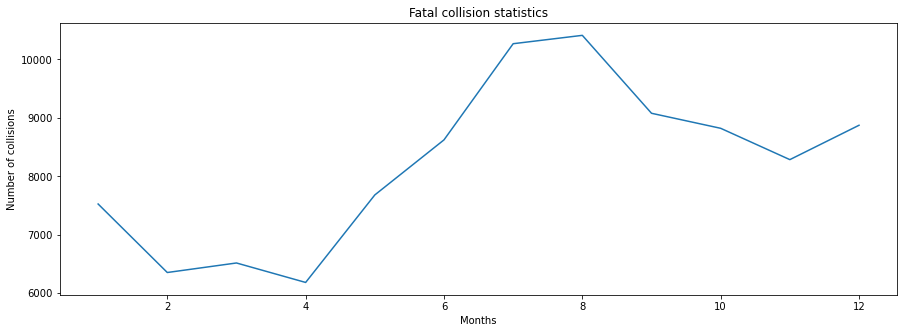

In [48]:
# Observamos en los meses de verano un aumento de las colisiones.
plotFATAL = df_modificado2['fatal'].plot(figsize=(15,5),title='Fatal collision statistics')
plotFATAL.set_xlabel("Months")
plotFATAL.set_ylabel("Number of collisions");

## V'CRAMER CORRELACIONES

La V de cramer nos es útil para estudiar la correlacion enyre dos variables categoricas. A pesar de ser diferentes las variables y que cada una tengan valores diferentes, pueden encontrarse en una tabla que muestra el coeficiente de contingencia de las frecuencias de las observaciones. Estos valores se encontraran entre un rango de 0 a 1, donde uno significa completamente correlacionadas y cero todo lo contario.

También hay que observar que para el cálculo del coeficiente de Cramer, se necesita previamente tener calculado el estadístico Chi Cuadrado.

P_SEX          F          M
C_SEV                      
0      98.742717  98.013149
1       1.257283   1.986851


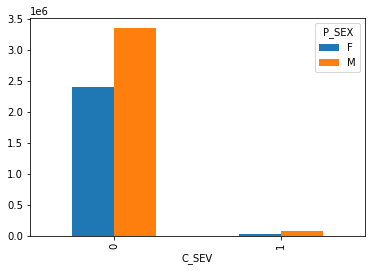

In [50]:
confusion_matrix = pd.crosstab(df_car["C_SEV"], df_car["P_SEX"]
).apply(lambda r: r/r.sum() *100,
                                axis=0)
plot = pd.crosstab(index=df_car['C_SEV'],
            columns=df_car['P_SEX']).plot(kind='bar')
print(confusion_matrix)


In [ ]:
cramers_v(confusion_matrix.values)

0.0

C_CONF         01         02         03         04         05         06  \
C_SEV                                                                      
0       96.844098  97.536577  96.032283  96.533707  97.509388  97.457844   
1        3.155902   2.463423   3.967717   3.466293   2.490612   2.542156   

C_CONF         21        22         23         24         25         31  \
C_SEV                                                                     
0       99.632286  98.66197  98.548967  99.160697  99.029482  88.617091   
1        0.367714   1.33803   1.451033   0.839303   0.970518  11.382909   

C_CONF         32         33         34         35         36        41  \
C_SEV                                                                     
0       96.277507  98.987308  98.801885  98.620129  99.377229  98.17937   
1        3.722493   1.012692   1.198115   1.379871   0.622771   1.82063   

C_CONF        QQ  
C_SEV             
0       98.14022  
1        1.85978  


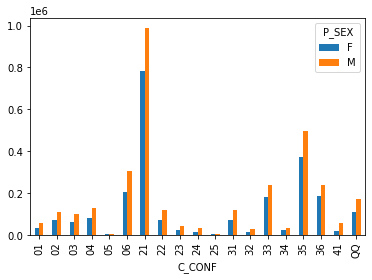

In [53]:
confusion_matrix = pd.crosstab(df_car["C_SEV"], df_car["C_CONF"]
).apply(lambda r: r/r.sum() *100,
                                axis=0)
plot = pd.crosstab(index=df_car['C_CONF'],
            columns=df_car['P_SEX']).plot(kind='bar')
print(confusion_matrix)

In [54]:
cramers_v(confusion_matrix.values)

0.11831493429359616

C_RALN         1          2          3          4          5          6  \
C_SEV                                                                     
0       98.66739  97.876632  96.284812  95.966943  96.793978  96.344024   
1        1.33261   2.123368   3.715188   4.033057   3.206022   3.655976   

C_RALN          Q  
C_SEV              
0       98.975596  
1        1.024404  


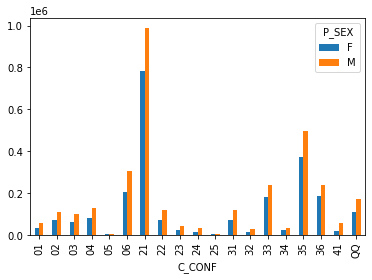

In [51]:
confusion_matrix = pd.crosstab(df_car["C_SEV"], df_car["C_RALN"]
).apply(lambda r: r/r.sum() *100,
                                axis=0)
plot = pd.crosstab(index=df_car['C_CONF'],
            columns=df_car['P_SEX']).plot(kind='bar')
print(confusion_matrix)

In [52]:
cramers_v(confusion_matrix.values)

0.0

In [ ]:
df_car.to_csv('df_car.csv', header = True, index = False)